# Error Bar Illustration

In [109]:
from datetime import datetime
from matplotlib import pylab as plt
import pandas as pd
import seaborn as sns

sns.set()

In [110]:
df_dataset = pd.read_csv('../data/processed/processed_daysahead3_R000.csv', index_col=0)
df_dataset.index = pd.to_datetime(df_dataset.index)
df_dataset.head()

,sigma,Vp_pred,Vp_obs,crps
2010-01-08 18:00:00,73.711060,320.569697,283.535000,24.496866
2010-01-09 00:00:00,70.522470,312.584848,289.951667,19.353964
2010-01-09 06:00:00,73.384475,304.600000,294.783333,17.672686
2010-01-09 12:00:00,71.817747,318.100000,291.255000,20.740659
2010-01-09 18:00:00,78.413401,305.400000,278.983333,21.842004


In [111]:

df_obs = pd.read_csv('../data/ace_hr.dat', sep="\\s+", comment="#")
df_obs = df_obs[df_obs.year >= df_dataset.index.min().year]
df_obs = df_obs[df_obs.year <= df_dataset.index.max().year]
df_obs.index = [
    datetime(int(row.year), int(row.month), int(row.day), int(row.hour))
    for _, row in df_obs.iterrows()
]


In [112]:
df_obs.head()

,juldate,month,day,hour,year,doy,Vp_obs,Br_obs,imf_obs,Np_obs,beta_obs
2010-01-01 00:00:00,15197.50,1,1,0,2010,1,276.62,0.09,1.0,0.0,0.0
2010-01-01 01:00:00,15197.54,1,1,1,2010,1,271.82,0.63,1.0,0.0,0.0
2010-01-01 02:00:00,15197.58,1,1,2,2010,1,273.09,0.58,1.0,0.0,0.0
2010-01-01 03:00:00,15197.62,1,1,3,2010,1,278.73,-0.05,-1.0,0.0,0.0
2010-01-01 04:00:00,15197.67,1,1,4,2010,1,271.79,0.11,1.0,0.0,0.0


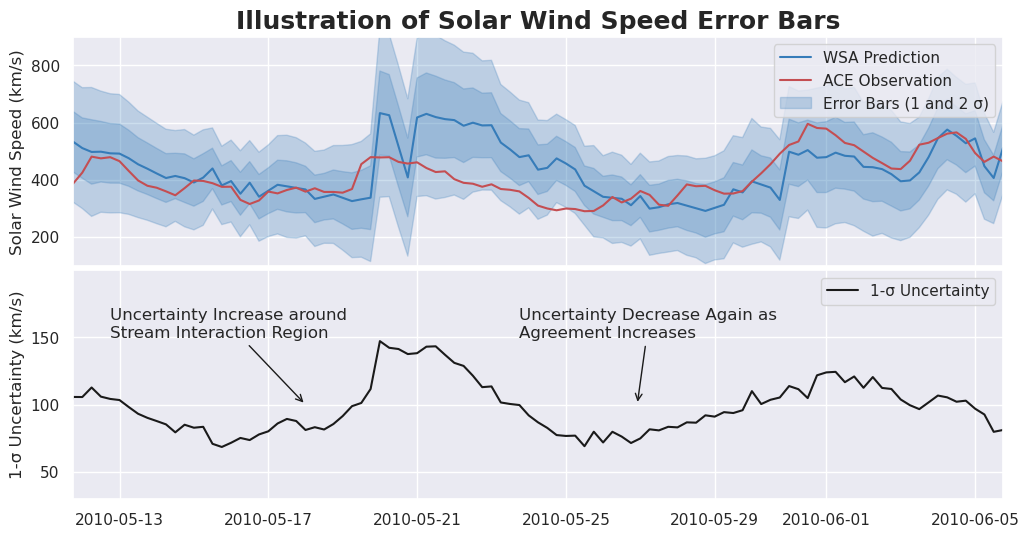

In [113]:
blue_color = '#367cb9'
red_color = 'r'
black_color= 'k'
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12, 6))

ax = axes[0]
ax.plot(df_dataset.index, df_dataset.Vp_pred, color=blue_color, label='WSA Prediction')
ax.plot(df_dataset.index, df_dataset.Vp_obs, color=red_color, label='ACE Observation')
ax.fill_between(df_dataset.index, df_dataset.Vp_pred - df_dataset.sigma, df_dataset.Vp_pred + df_dataset.sigma, alpha=0.25, color=blue_color, label='Error Bars (1 and 2 σ)')
ax.fill_between(df_dataset.index, df_dataset.Vp_pred - 2 * df_dataset.sigma, df_dataset.Vp_pred + 2 * df_dataset.sigma, alpha=0.25, color=blue_color)
ax.set_ylabel('Solar Wind Speed (km/s)')
ax.set_yticks([200, 400, 600, 800])
ax.set_ylim(100, 900)

ax = axes[1]
ax.plot(df_dataset.index, df_dataset.sigma, color=black_color, label='1-σ Uncertainty')
ax.set_ylabel('1-σ Uncertainty (km/s)')
ax.set_ylim(30, 200)
ax.set_yticks([50, 100, 150])

ax.annotate("Uncertainty Decrease Again as\nAgreement Increases",
            xytext=(pd.Timestamp('2010-05-23 18:00:00'), 150),
            xy=(pd.Timestamp('2010-05-26 22:00:00'), 100),
            arrowprops=dict(arrowstyle="->", color='k'))

ax.annotate("Uncertainty Increase around\nStream Interaction Region",
            xytext=(pd.Timestamp('2010-05-12 18:00:00'), 150),
            xy=(pd.Timestamp('2010-05-18 00:00:00'), 100),
            arrowprops=dict(arrowstyle="->", color='k'))

for ax in axes:
    ax.legend()

#i = 500
#print(repr((df_dataset.index[i], df_dataset.index[i + 100])))
#    ax.set_xlim(df_dataset.index[i], df_dataset.index[i + 100])

#plt.xlim(pd.Timestamp('2010-02-25 18:00:00'), pd.Timestamp('2010-03-22 18:00:00'))
axes[0].set_xlim((pd.Timestamp('2010-05-11 18:00:00'), pd.Timestamp('2010-06-05 18:00:00')))
axes[0].set_title('Illustration of Solar Wind Speed Error Bars', fontweight='bold', fontsize=18)
plt.subplots_adjust(wspace=0.4, hspace=0.02) 
plt.savefig('../plots/error_bar_illustration.png', dpi=300)